# Mod 4 Project - Which 5 Zipcodes in the United States are the best real estate investments?

By: Gabe Blatsetin

Presntation: Please see attached for the accompanied presentation

### Introduction/Background 

#### Assumptions

 - The real estate firm, National Archive LLC,  is a multi million dollar RIT that has had a great year finacially.
 - Due to their outstanding financial position, the company has around xx amount in cash
 - National Archive would like to invest in the zipcodes that have the highest rate of return
 - The following analysis has expected holding periods for their investments; 3, 5, and 10 years
 - The zillow dataset provided by National Archive was used for this analysis as requested

#### How does one define the best zipcodes?

As the consultant for National Archive, two major factors were taken into account to define the best zipcode.

    1. ROI: Return on Investment was the first feature derived from the data set. This is a basic investment metric that measures essentailly the price of a investment at the start of some time period x, subtracted from the current market value of the asset; all divided by the orginal price. 
    
        Formula: start
        
        FIGURE OUT HOW TO PUT IN ACTUAL FORMULA 
        
    2. Average Price: The average price of each zipcode was taken over the 25 year time period provided. This provides insight into the price of the homes in each zipcodes market. Considering National Archive has plenty of capital, we do not have to worry about any monetary constraints.


Using the above factors, I was able to deduce where the biggest real estate return would be for National Archive. I decided to diversify the portfolio which I will touch on later. With any fianncial investment the golden rule of diversification is key. A investor does not want all of his or her money tied into one type of investment (finacnial world) or in this case region (Real Estate).  

# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [2]:
import pandas as pd 
from pandas import Series #Imported necessary pandas libraries
import matplotlib.pyplot as plt #Imported matplotlib for visualizations & Visualizations will show up inline 
%matplotlib inline
import numpy as np #Imported numpy for basic arithmatic
from statsmodels.tsa.stattools import adfuller #Imported AdFuller test for stationarity check purposes
from pandas.plotting import autocorrelation_plot #Visualization used for ARMA model purposes
from statsmodels.tsa.arima_model import ARMA #Code for ARMA model
import statsmodels.api as sm #Imported stats


df= pd.read_csv('zillow_data.csv')

df.head()


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [5]:
df['AvgHomePrice']= df.mean(skipna=True, axis=1) #Creating a new column for average home price

In [6]:
df['ROI']= (df.iloc[:,-1]-df.iloc[:,7])/df.iloc[:,7] #Creating the ROI column

In [7]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,AvgHomePrice,ROI
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,736192.955224,1.202851
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,312500,314100,315000,316600,318100,319600,321100,321800,217815.447761,-0.075878
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320200,320400,320800,321200,321200,323000,326900,329900,259808.876866,0.234833
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,963776.619403,0.934906
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,120000,120300,120300,120300,120300,120500,121000,121500,101380.914179,0.311525


Now that the data is loaded, the next step will be to turn the data from wide format into long format. Using the pandas melt method, we will transform our data set and rid our data of uneccesary data.

The most important columns are;

    1. Region Name: Zipcode in US
    2. City: US City 
    3. Metro: Metro area of Zipcode
    4. AvgHomePrice: The average historical homeprice for each zipcode
    5. ROI: Return on Investment from April 1996 until April 2018

In [9]:
df_melted=pd.melt(df, id_vars=['RegionName', 'City', 'Metro','AvgHomePrice', 'ROI'], value_vars=df.iloc[:,7:-3], var_name='Date', value_name='Price')

In [10]:
current_price=df_melted[df_melted['Date']=='2018-04'] #Here we are getting the top 25 most expensive zipcodes

In [11]:
current_price.sort_values('Price', ascending=False).head(10)

,RegionName,City,Metro,AvgHomePrice,ROI,Date,Price


I decided to come up with the most expensive zipcodes currently, and avoid these as we want to get the best return on our investment with spending the least amount of money

In [10]:
# top_10_Std= df[['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'AvgHomePrice', 'ROI', 'StdPrice']].sort_values('StdPrice', ascending= True).head(25)

In [18]:
# top_10_Std.head()

In [14]:
top_10_ROI= df[['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'AvgHomePrice', 'ROI']].sort_values('ROI', ascending= False).head(10)

In [15]:
top_10_ROI #Created a dataframe for the top 10 ROI zipcode

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,AvgHomePrice,ROI
13830,66102,19951,Harbeson,DE,Salisbury,Sussex,13831,1.978664e+05,4.735257
6048,83143,57110,Sioux Falls,SD,Sioux Falls,Minnehaha,6049,1.615784e+05,4.368052
14217,93399,80449,Hartsel,CO,Denver,Park,14218,1.448611e+05,3.828702
106,62026,11215,New York,NY,New York,Kings,107,1.063203e+06,3.710690
11172,62321,11976,Water Mill,NY,New York,Suffolk,11173,1.783536e+06,3.458839
13864,62320,11975,Wainscott,NY,New York,Suffolk,13865,1.556934e+06,3.454746
9619,69428,27583,Timberlake,NC,Durham,Person,9620,1.441740e+05,3.449815
117,62022,11211,New York,NY,New York,Kings,118,5.887785e+05,3.420259
3955,82299,55449,Blaine,MN,Minneapolis-St Paul,Anoka,3956,2.256519e+05,3.407263
11728,62281,11930,Amagansett,NY,New York,Suffolk,11729,1.446869e+06,3.405814


In [16]:
top_10_AvgHomePrice= df[['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'AvgHomePrice', 'ROI']].sort_values('AvgHomePrice', ascending= False)

In [17]:
top_10_AvgHomePrice.head(10) # Created another DataFrame for the top 10 avergage price of a home by zipcode

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,AvgHomePrice,ROI
272,61635,10021,New York,NY,New York,New York,273,1.263432e+07,NaN
20,61625,10011,New York,NY,New York,New York,21,7.613538e+06,NaN
508,61628,10014,New York,NY,New York,New York,509,6.720111e+06,NaN
21,61703,10128,New York,NY,New York,New York,22,5.028777e+06,0.367742
10237,97518,94027,Atherton,CA,San Francisco,San Mateo,10238,3.448847e+06,1.924735
7596,93816,81611,Aspen,CO,Glenwood Springs,Pitkin,7597,3.112578e+06,1.156869
4816,96086,90210,Beverly Hills,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,4817,2.759459e+06,1.717608
4723,72636,33480,Palm Beach,FL,Miami-Fort Lauderdale,Palm Beach,4724,2.605421e+06,1.718511
2026,97577,94123,San Francisco,CA,San Francisco,San Francisco,2027,2.602249e+06,2.064714
742,97569,94115,San Francisco,CA,San Francisco,San Francisco,743,2.372893e+06,1.988531


The following zipcodes were chosen, a description of the zipcode is provided along with their ROI rank and any other deciding factors:

1. 11211
    - City, State, County Name: New York, New York, King
    - ROI Rank: 1st 
    - Avg. Price Rank: 
    
2. 11930
    - City, State, County Name: New York, New York, Suffolk 
    - ROI Rank: 7th
    - Avg. Price Rank:
    
3. 80449
    - City, State, County Name: Hartsel, Colorado, Park
    - ROI Rank: 8th
    - Avg. Price Rank:
    
4. 20001
    - City, State, County Name: Washington, D.C, Disctric of Colombia
    - ROI Rank: 10th
    - Avg. Price Rank:
    
5. 7320 
    - City, State, County Name: Jersey City, NJ, Hudson
    - ROI Rank: 4th
    - Avg. Price Rank: 

Diversity in the locations of the houses, we have one west coast zip followed with one midwest and then three east coast cities. Statyed in the major cities due to it being where the greatest ROI has been seen over the past 25 years. Also, there is less risk in the cities due to the trend of millenials along with gen z migratiing to cities.  People will always need places to live and the properties will only increase in property value due to growing demand. m

# Step 2: Data Preprocessing

11211 King County NY 

11930 NY Suffolk County

80449 Hartsel CO 

20001 Washington DC

7302 Jersey City, NJ

Defining a function to use on data frames to be able to take a dataframe and turn it into a time series

In [25]:
def get_datetimes(df):
    df['Date']=pd.to_datetime(df.Date, format= '%Y-%m')
    df.set_index('Date', inplace=True)

In [19]:
top_5_zips= [11211, 11930, 80449, 20001, 7302] #Created a list of the top 5 zips to use for a for loop

In [20]:
list_of_zips= {} #Using a for loop to take the zipcodes and put them all in one dictionary which will eventually be turned into dataframe
for zipcode in top_5_zips:
    list_of_zips[zipcode] = pd.melt(df[df['RegionName']== zipcode], value_vars=df.iloc[:,7:-3], var_name='Date', value_name= 'Price')

In [21]:
list_of_zips.keys() #Double checking to make sure the dictionary has all 5 zips

dict_keys([11211, 11930, 80449, 20001, 7302])

In [22]:
list_of_zips #Another double check to look at the data

{11211:         Date      Price
 0    1996-04   133200.0
 1    1996-05   132900.0
 2    1996-06   132500.0
 3    1996-07   132200.0
 4    1996-08   131800.0
 5    1996-09   131600.0
 6    1996-10   131500.0
 7    1996-11   131800.0
 8    1996-12   132400.0
 9    1997-01   133100.0
 10   1997-02   133600.0
 11   1997-03   134100.0
 12   1997-04   134400.0
 13   1997-05   134700.0
 14   1997-06   135000.0
 15   1997-07   135400.0
 16   1997-08   135900.0
 17   1997-09   136400.0
 18   1997-10   137200.0
 19   1997-11   138300.0
 20   1997-12   139800.0
 21   1998-01   141500.0
 22   1998-02   142900.0
 23   1998-03   144200.0
 24   1998-04   145300.0
 25   1998-05   146200.0
 26   1998-06   147000.0
 27   1998-07   147700.0
 28   1998-08   148500.0
 29   1998-09   149300.0
 ..       ...        ...
 234  2015-10  1223700.0
 235  2015-11  1235100.0
 236  2015-12  1259300.0
 237  2016-01  1287100.0
 238  2016-02  1314300.0
 239  2016-03  1329700.0
 240  2016-04  1343600.0
 241  2016-05  134

In [21]:
#come back to try and create for loop to do this for us

In [23]:
df_11211=pd.DataFrame(data= list_of_zips[11211])
df_11930=pd.DataFrame(data= list_of_zips[11930])
df_80449=pd.DataFrame(data= list_of_zips[80449])
df_20001=pd.DataFrame(data= list_of_zips[20001])
df_7302=pd.DataFrame(data= list_of_zips[7302])

In [26]:
get_datetimes(df_11211) #Using the dateime function to convert all data into time series data
get_datetimes(df_11930)
get_datetimes(df_80449)
get_datetimes(df_20001)
get_datetimes(df_7302)

In [27]:
# top_5= [df_11211, df_11930, df_80449, df_20001, df_7302]

In [28]:
# df_11211['Zip']= 11211
# df_11930['Zip']= 11930
# df_80449['Zip']= 80449
# df_20001['Zip']= 20001
# df_7302['Zip']= 7302

In [29]:
top_zips_series=pd.concat([df_11211, df_11930, df_80449, df_20001, df_7302], axis=1) #Creating a dataframe with top five zips time series
top_zips_series.columns=[11211, 11930, 80449, 20001, 7302]
top_zips_series.head()

,11211,11930,80449,20001,7302
Date,,,,,
1996-04-01,133200.0,328400.0,30000.0,92000.0,137200.0
1996-05-01,132900.0,327900.0,30400.0,92600.0,137800.0
1996-06-01,132500.0,327100.0,30900.0,93200.0,138500.0
1996-07-01,132200.0,325900.0,31400.0,93900.0,139100.0
1996-08-01,131800.0,324500.0,31800.0,94600.0,139600.0


We have successfully transformed our data into one DataFrame containing all five zipcodes historical prices. The next step is to do a little EDA and check for stationarity. 

# Step 3: EDA and Visualization

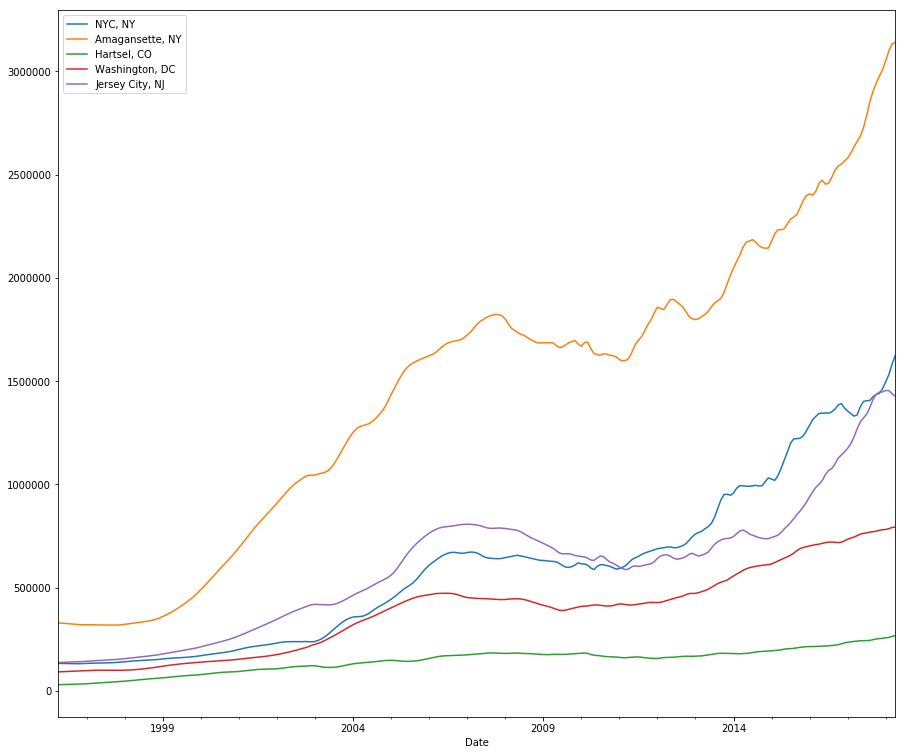

In [29]:
top_zips_series.plot(figsize=(15,13)) #Graphing the time series 
plt.legend(['NYC, NY', 'Amagansette, NY', 'Hartsel, CO', 'Washington, DC', 'Jersey City, NJ'])

There is a obvious trend in the graph above. This is expected as generally real estate appreciates over time. Furthermore, given we selected the zipcodes with a high ROI, we would expect the trend lines to have a positive trend.

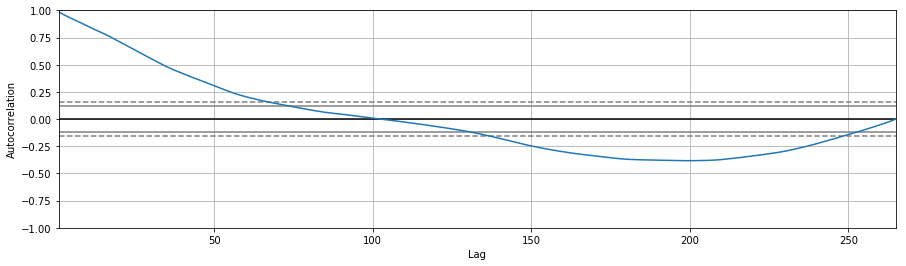

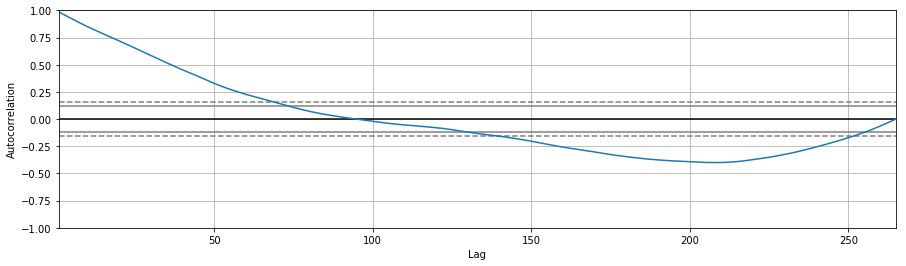

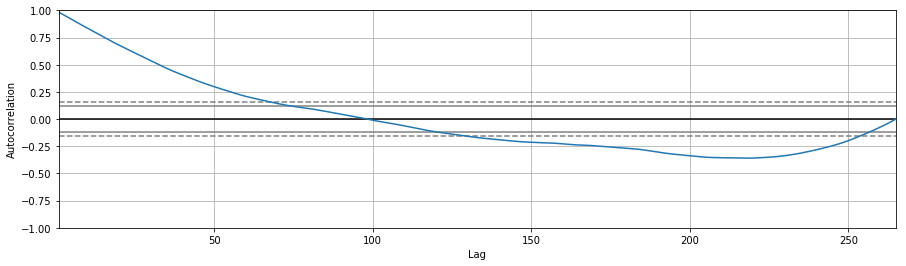

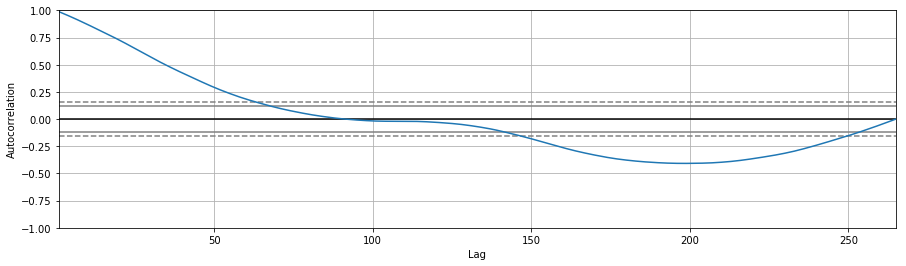

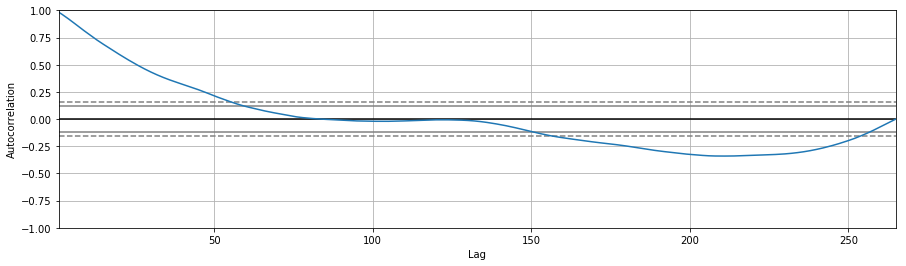

In [41]:
for x in top_zips_series:
    plt.figure(figsize=(15,4))
    df=autocorrelation_plot(top_zips_series[x])

# Step 4: Removing Trends and Seasonality

In [73]:
# def stationarity_check(TS,zipcode):
    
#     # Import adfuller
#     from statsmodels.tsa.stattools import adfuller
    
#     # Calculate rolling statistics
#     rolmean = TS.rolling(window = 8, center = False).mean()
#     rolstd = TS.rolling(window = 8, center = False).std()
    
#     # Perform the Dickey Fuller Test
#     dftest = adfuller(TS[zipcode]) # change the passengers column as required 
    
#     #Plot rolling statistics:
#     fig = plt.figure(figsize=(12,6))
#     orig = plt.plot(TS, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
#     # Print Dickey-Fuller test results
#     print ('Results of Dickey-Fuller Test:')

#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print (dfoutput)
    
#     return None

In [38]:
#Figure out how to add in the different zips to the labels
def stationarity_check_graph(orig_df, window, zipcode):
    rolling_mean= orig_df[zipcode].rolling(window=window, center= False).mean()
    rolling_std= orig_df[zipcode].rolling(window=window, center= False).std()
    
    fig = plt.figure(figsize=(15,6))
    orig = plt.plot(orig_df[zipcode], color='blue',label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color= 'green', label= 'Rolling Std')
    plt.legend(loc='best')
    plt.title(zipcode)
    
def stationarity_check_test(orig_df, zipcode):
    dftest = adfuller(orig_df[zipcode])
    print ('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    

In [39]:
for x in top_5_zips:
    print(x)
    stationarity_check_test(top_zips_series, x)

11211
Results of Dickey-Fuller Test:
Test Statistic                   2.202131
p-value                          0.998884
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64
11930
Results of Dickey-Fuller Test:
Test Statistic                   0.617360
p-value                          0.988036
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64
80449
Results of Dickey-Fuller Test:
Test Statistic                  -0.020433
p-value                          0.956809
#Lags Used                      16.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%

11211
11930
80449
20001
7302


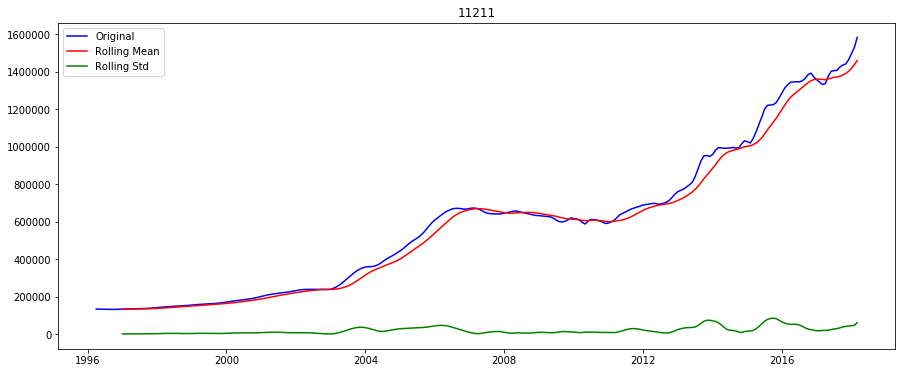

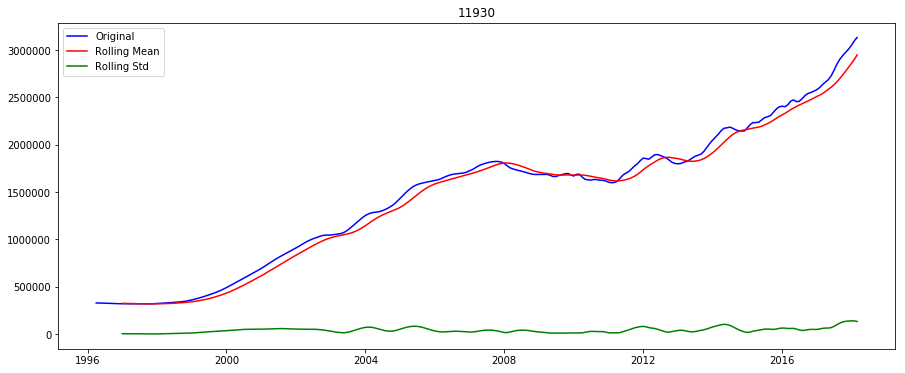

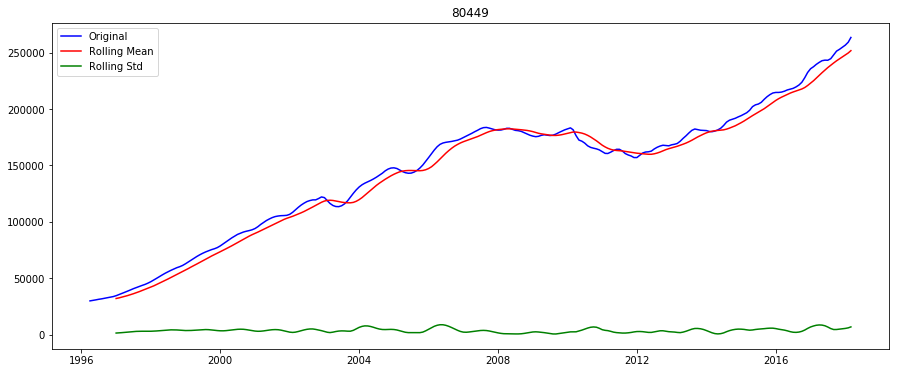

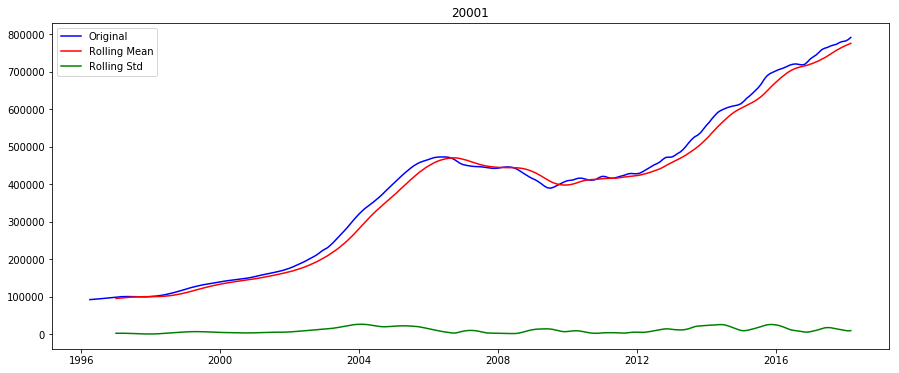

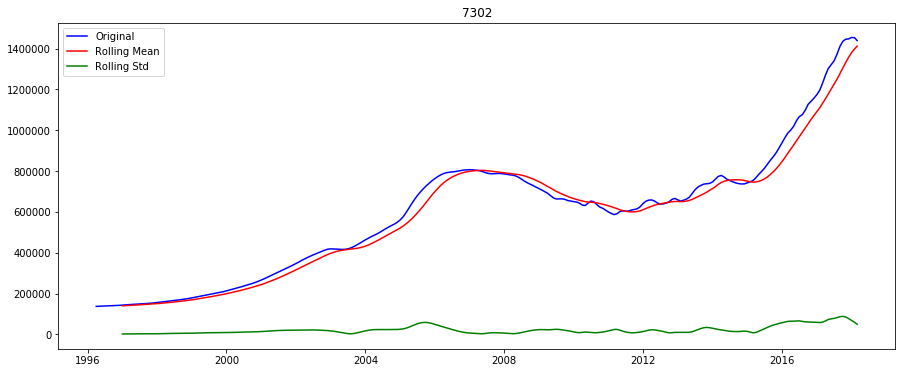

In [40]:
for x in top_5_zips:
    print(x)
    stationarity_check_graph(top_zips_series, 10,x)

First we will try a log transform to try to create stationary data.

In [41]:
log_top_zips_series=np.log(top_zips_series)

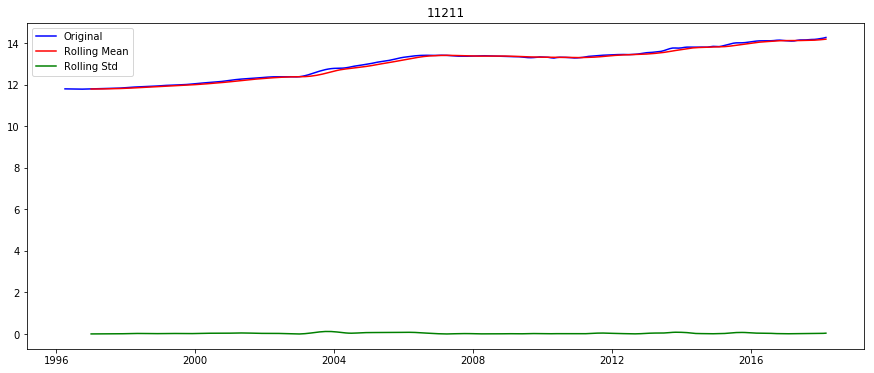

In [43]:
stationarity_check_graph(log_top_zips_series, 10, 11211)

This did not prove to be very effective so we will try a rolling mean to get rid of our trend in our data.


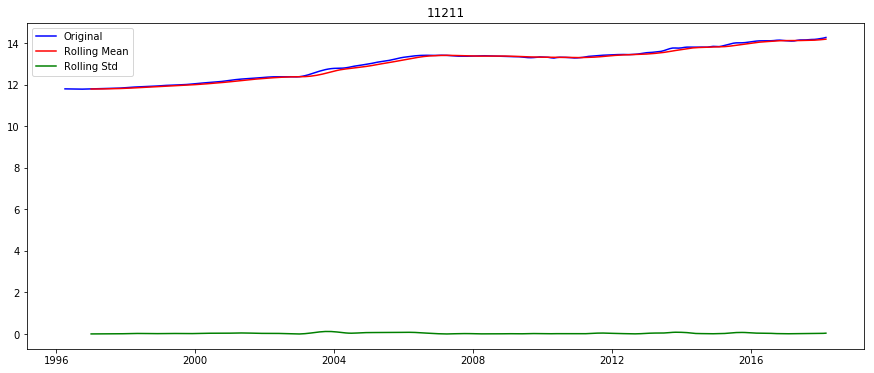

In [44]:
stationarity_check_graph(log_top_zips_series, 10, 11211)

As you can see these two graphs are not very different whatsoever. Clearly we need to try something else to help our data become even more stationary. 

Next we will try subtracting the rolling mean from the log transformed data to see if that benefits our data.

In [88]:
roll_mean_sub= log_top_zips_series-(log_top_zips_series.rolling(window=4 ,center=False).mean())
roll_mean_sub.dropna(inplace=True)

In [89]:
stationarity_check_test(roll_mean_sub,11211)

Results of Dickey-Fuller Test:
Test Statistic                  -2.747436
p-value                          0.066183
#Lags Used                      15.000000
Number of Observations Used    245.000000
Critical Value (1%)             -3.457326
Critical Value (5%)             -2.873410
Critical Value (10%)            -2.573096
dtype: float64


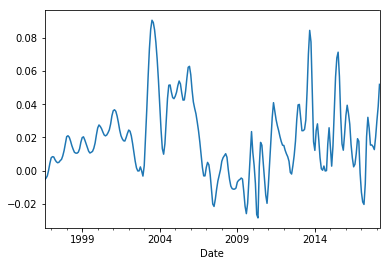

In [51]:
roll_mean_sub[11211].plot()

Now we are getting somewhere. Our p-value went down significantly here, so lets continue with this idea and instead of subtracting the rolling mean we will subtract the weighted rolling mean. 

In [59]:
exp_rollmean= log_top_zips_series.ewm(halflife= 2).mean()
zips_minus_exp_weighted = log_top_zips_series - exp_rollmean

In [60]:
stationarity_check_test(zips_minus_exp_weighted, 11211)

Results of Dickey-Fuller Test:
Test Statistic                  -2.263419
p-value                          0.184037
#Lags Used                      16.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


Since this increased our p-value, we are going to use the normal rolling mean instead of the exponetial weighted movign average. We are going to use differencing to see if we can get our p-value below the acceptable .05 level for us to call our data stationary. 

In [90]:
zip_codes_diff= roll_mean_sub.diff(periods=10)
zip_codes_diff.dropna(inplace=True)

In [91]:
stationarity_check_test(zip_codes_diff, 11211)

Results of Dickey-Fuller Test:
Test Statistic                  -5.257198
p-value                          0.000007
#Lags Used                      16.000000
Number of Observations Used    234.000000
Critical Value (1%)             -3.458608
Critical Value (5%)             -2.873972
Critical Value (10%)            -2.573396
dtype: float64


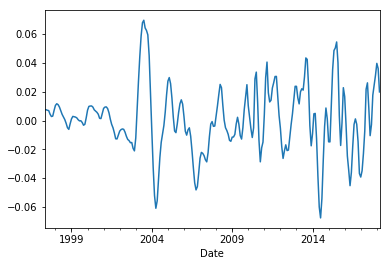

In [92]:
zip_codes_diff[11211].plot()

In [93]:
for x in top_5_zips:
    print(x)
    stationarity_check_test(zip_codes_diff, x)

11211
Results of Dickey-Fuller Test:
Test Statistic                  -5.257198
p-value                          0.000007
#Lags Used                      16.000000
Number of Observations Used    234.000000
Critical Value (1%)             -3.458608
Critical Value (5%)             -2.873972
Critical Value (10%)            -2.573396
dtype: float64
11930
Results of Dickey-Fuller Test:
Test Statistic                  -4.127868
p-value                          0.000871
#Lags Used                      15.000000
Number of Observations Used    235.000000
Critical Value (1%)             -3.458487
Critical Value (5%)             -2.873919
Critical Value (10%)            -2.573367
dtype: float64
80449
Results of Dickey-Fuller Test:
Test Statistic                -6.016696e+00
p-value                        1.527672e-07
#Lags Used                     1.600000e+01
Number of Observations Used    2.340000e+02
Critical Value (1%)           -3.458608e+00
Critical Value (5%)           -2.873972e+00
Critica

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D13D714A8>,
      dtype=object)

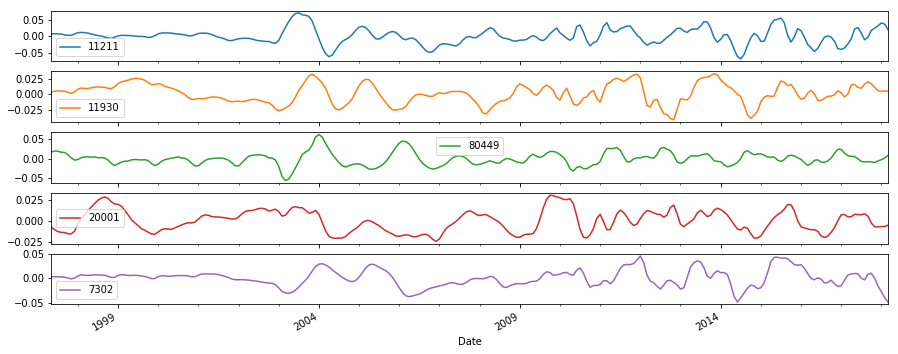

In [117]:
zip_codes_diff.plot(figsize=(15,6),subplots=True)

# Step 5: ARIMA Modeling

In [191]:
bruh=pd.DataFrame(zip_codes_diff[11211])
bruh.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 1997-04-01 to 2018-04-01
Data columns (total 1 columns):
11211    253 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


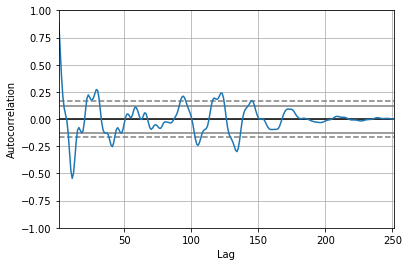

In [109]:
autocorrelation_plot(zip_codes_diff[11211])

In [ ]:
#add in the train data to find the optimal order

In [192]:
# Fit an AR(1) model to the first simulated data
mod_arma = ARMA(bruh, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                  11211   No. Observations:                  253
Model:                     ARMA(1, 0)   Log Likelihood                 715.899
Method:                       css-mle   S.D. of innovations              0.014
Date:                Wed, 26 Jun 2019   AIC                          -1425.799
Time:                        22:09:44   BIC                          -1415.198
Sample:                    04-01-1997   HQIC                         -1421.534
                         - 04-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0096      0.020      0.479      0.632      -0.030       0.049
ar.L1.11211     0.9586      0.018     54.423      0.000       0.924       0.993
                                    Roots       

C:\Users\GBLS\AppData\Local\Continuum\anaconda3\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GBLS\AppData\Local\Continuum\anaconda3\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


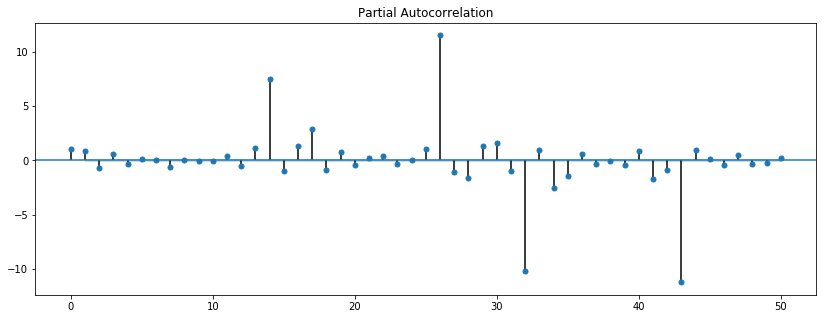

In [116]:
# Look into this

from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(zip_codes_diff[11211], lags = 50);

In [ ]:
pred = output.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_conf = pred.conf_int()

# Step 6: Interpreting Results